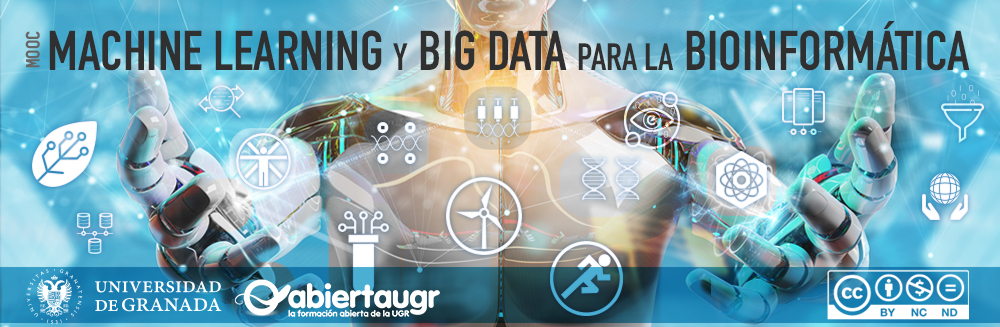
## **Módulo 7 - Big Data**
### **7.4 - Clasificación, Regresión, Clustering y Reglas de Asociación en Spark**

**Autor**: 

*Por* **Fco. Javier García Castellano**.

*Profesor Titular de Universidad. Departamento de Ciencias de Computación e Inteligencia Artificial (DECSAI). Universidad de Granada.*


**Recordatorio: Introducción a NoteBook**

Dentro de este cuaderno (NoteBook), se le guiará paso a paso desde la carga de un conjunto de datos hasta el análisis descriptivo de su contenido.

El cuaderno de Jupyter es un enfoque para ejecutar celdas precodificadas y ver los resultados directamente sobre la celda ejecutada. Cada celda de este cuaderno debe ser ejecutada secuencialmente. Si te saltas alguna, puede que el programa lance un error, así que empieza desde el principio en caso de duda.

Antes de nada 

Es muy muy importante que al comienzo selecciones "Abrir en modo de ensayo" (draft mode), arriba a la izquierda. En caso contrario no te dejará ejecutar ningún bloque de código. Cuando ejecutes el primero de los bloques, aparecerá el siguiente mensaje: "Advertencia: Este cuaderno no lo ha creado Google.". Tranquilos, debéis confiar en el contenido del cuaderno (NoteBook) y pulsar en "Ejecutar de todos modos".

¡Ánimo!

¡Vamos a por todas!
Haz clic en el botón "play" en la parte izquierda de cada celda de código. Las líneas que comienzan con un hashtag (#) son comentarios y no afectan a la ejecución del programa.

También puedes pinchar sobre cada celda y hacer "ctrl+enter" (cmd+enter en Mac).

Cada vez que ejecutes algo, verás la salida justo debajo. La información suele ser siempre la relativa a la última instrucción, junto con todos los print() que haya en el código.

## **ÍNDICE**


En este *notebook*: 
1. Vamos a aprender distintos algoritmos de aprendizaje supervisado que hay en Apache Spark, tanto para clasificación como regresión.
2. También trabajaremos con distintos métodos de aprendizaje no supervisado en Spark, como Clustering y Reglas de Asociación.

Contenidos:
1. Introducción

2. Clasificación en Spark.

3. Regresión en Spark.  

4. Clustering en Spark. 

5. Reglas de Asociación en Spark.



##**1. INTRODUCCIÓN.**

Ya hemos visto la metodología para trabajar con Big Data usando Apache Spark. 

Ahora vamos a ver distintas herramientas que ya hemos visto en otros apartados del curso, por ejemplo, veremos como usar un regresor o un clasificador en Spark. Se hace necesario remarcar que los distintos algoritmos que se van a ver aquí están programados para ser ejecutados de forma distribuida, con tolerancia a fallos y escalables, es decir, están pensados para ser ejecutados en muchos ordenadores simultáneamente, cuantos más ordenadores tengamos, mejor irá, y además, no hay problema si falla uno o varios ordenadores. 

En este cuaderno (notebook) vamos a seguir trabajando con Apache Spark en Google Colaboratory, por lo que los prolegómenos son los mismos, como se muestran a continuación.

In [ ]:
#Primero instalamos Java y Apache Spark
!apt-get install openjdk-8-jdk-headless -qq  #Instalamos Java

#Nos descargamos Apache Spark con Hadoop
!wget -q https://downloads.apache.org/spark/spark-2.4.7/spark-2.4.7-bin-hadoop2.7.tgz
!tar xf spark-2.4.7-bin-hadoop2.7.tgz #Instalamos Apache Spark


#Instalamos los paquetes de Python para trabajar con Spark
!pip install findspark #Instalamos FindSpark
!pip install pyspark   #Instalamos Spark

#Indicamos a PySpark donde está Spark
import findspark
findspark.init("spark-2.4.7-bin-hadoop2.7")#SPARK_HOME


#Inicializamos las variables de entorno
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.7-bin-hadoop2.7"

#Creamos una sesión de Spark para poder trabajar
from pyspark.sql import SparkSession
spark = SparkSession.builder \
    .master("local[*]") \
    .appName("Ejemplos de Aprendizaje Supervisado y no supervisado en PySpark") \
    .config("spark.sql.execution.arrow.enabled", "true") \
    .getOrCreate()

    

Selecting previously unselected package openjdk-8-jre-headless:amd64.
(Reading database ... 160975 files and directories currently installed.)
Preparing to unpack .../openjdk-8-jre-headless_8u282-b08-0ubuntu1~18.04_amd64.deb ...
Unpacking openjdk-8-jre-headless:amd64 (8u282-b08-0ubuntu1~18.04) ...
Selecting previously unselected package openjdk-8-jdk-headless:amd64.
Preparing to unpack .../openjdk-8-jdk-headless_8u282-b08-0ubuntu1~18.04_amd64.deb ...
Unpacking openjdk-8-jdk-headless:amd64 (8u282-b08-0ubuntu1~18.04) ...
Setting up openjdk-8-jre-headless:amd64 (8u282-b08-0ubuntu1~18.04) ...
update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/orbd to provide /usr/bin/orbd (orbd) in auto mode
update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/servertool to provide /usr/bin/servertool (servertool) in auto mode
update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/tnameserv to provide /usr/bin/tnameserv (tnameserv) in auto mode
Setting up ope

##**2. CLASIFICACIÓN EN APACHE SPARK.**

Como vimos en las primeras etapas del curso,  el aprendizaje supervisado es aquella parte del Machine Learningg donde tenemos los datos correctamente etiquetados o clasificados. A los algoritmos de aprendizaje supervisado también se les denomina clasificadores pues dado un conjunto de variables de entrada predicen a que valor de la variable de salida pertenecen. En un clasificador, tenemos por tanto, variables de entrada y la variable de salida.

Lo primero que vamos a hacer es descargarnos los datos con los que vamos a trabajar y leerlos en un DataFrame.

In [ ]:
#Nos descargamos los ficheros de datos en Google Colaboratory 
#!wget -nv -c --no-check-certificate 'https://docs.google.com/uc?export=download&id=1J3jo-YRKGX1lBjA0-B8U1ZJibHYEAbmL' -O inmune_X.csv
!wget -nv  --no-check-certificate 'https://docs.google.com/uc?export=download&id=1PYzEIdmnfjOnBpPDIFBE9hL1Lkj_OBCk' -O inmune_X.csv
!wget -nv  --no-check-certificate 'https://docs.google.com/uc?export=download&id=1hHQfcvrFa5Jds-9tW_X4sHjKpYKdii9s' -O inmune_Y.csv 

#Leemos el fichero con las variables de entrada
dfX = spark.read.csv('inmune_X.csv',inferSchema=True, header=True)
#Leemos el fichero con la variable de salida
dfY = spark.read.csv('inmune_Y.csv',inferSchema=True, header=True)

#Unimos los dos DataFrame
df=dfX.join(dfY, dfX._c0 == dfY._c0).drop('_c0')

#Eliminamos la columna que indica el número de instancia
dfX=dfX.drop('_c0')
dfY=dfY.drop('_c0')

#Partimos los datos (sin preprocesar)
train, test = df.randomSplit([0.7, 0.3], seed = 2020)

2021-03-09 11:11:26 URL:https://doc-14-90-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/dfs90rdesh5mnbo3aj3oqfcs08li0s35/1615288275000/05131985187150583765/*/1PYzEIdmnfjOnBpPDIFBE9hL1Lkj_OBCk?e=download [314913/314913] -> "inmune_X.csv" [1]
2021-03-09 11:11:27 URL:https://doc-0c-90-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/cng2bhpafippo1fiathm4so6fibsubl6/1615288275000/05131985187150583765/*/1hHQfcvrFa5Jds-9tW_X4sHjKpYKdii9s?e=download [3949/3949] -> "inmune_Y.csv" [1]


Ahora preparamos las distintas etapas para preprocesar los datos, es decir prepararlos para que podamos aprender modelos con ellos. Además los partiremos en dos conjuntos, uno de entrenamiento y otro de test.

In [ ]:
#Preprocesamos los datos para usarlos en un algoritmo de aprendizaje supervisado
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import VectorAssembler

#Indexamos la variable a clasificar
indexador = StringIndexer(inputCol="RNASEQ-CLUSTER_CONSENHIER", outputCol="clase")

#Unimos los atributos con VectorAssembler
assembler = VectorAssembler(inputCols=dfX.columns,outputCol="atributos")

#Guardamos las etapas del preprocesamiento para qeu se usen en una tubería
etapas=[indexador, assembler]

#Partimos los datos (sin preprocesar)
train, test = df.randomSplit([0.7, 0.3], seed = 2020)

En Apache Spark encontramos distintos clasificadores ya implementados. Distinguiremos aquellos que son para clasificación binaria, es decir, la variable de salida sólo tiene dos estados, de los que son para clasificación multiclase, es decir, aquellos en los que la variable de salida tiene más de dos estados.

<table>
<tr>
<th><p>Tipo de Problema</p>
</th><th><p> Métodos implementados en Spark</p>
</th></tr>

<tr><td><p>Clasificación Binaria</p>
</td><td><p>
<a href="https://spark.apache.org/docs/latest/ml-classification-regression.html#binomial-logistic-regression">Regresión Binaria Logística</a><br/>
<a href="https://spark.apache.org/docs/latest/ml-classification-regression.html#linear-support-vector-machine"> Máquinas de Vectores de Soporte</a><br/>
<a href="https://spark.apache.org/docs/latest/ml-classification-regression.html#decision-tree-classifier">Árboles de Decisión</a><br/>
<a href="https://spark.apache.org/docs/latest/ml-classification-regression.html#random-forest-classifier">Random Forest</a><br/>
<a href="https://spark.apache.org/docs/latest/ml-classification-regression.html#gradient-boosted-tree-classifier">Potenciación del Gradiente (Gradient-boosted tree)</a><br/>
<a href="https://spark.apache.org/docs/latest/ml-classification-regression.html#multilayer-perceptron-classifier">Perceptrón Multicapa</a><br/>
<a href="https://spark.apache.org/docs/latest/ml-classification-regression.html#naive-bayes">Naïve Bayes</a></p>
</td></tr>

<tr><td><p>Clasificación Múltiple</p>
</td><td><p><a href="https://spark.apache.org/docs/latest/ml-classification-regression.html#multinomial-logistic-regression">Regresión Logística Multinomial</a> <br/>
<a href="https://spark.apache.org/docs/latest/ml-classification-regression.html#decision-tree-classifier">Árboles de Decisión</a><br/>
<a href="https://spark.apache.org/docs/latest/ml-classification-regression.html#random-forest-classifier">Random Forest</a><br/>
<a href="https://spark.apache.org/docs/latest/ml-classification-regression.html#gradient-boosted-tree-classifier">Potenciación del Gradiente (Gradient-boosted tree)</a><br/>
<a href="https://spark.apache.org/docs/latest/ml-classification-regression.html#multilayer-perceptron-classifier">Perceptrón Multicapa</a><br/>
<a href="https://spark.apache.org/docs/latest/ml-classification-regression.html#naive-bayes">Naïve Bayes</a><br />
<a href="https://spark.apache.org/docs/latest/ml-classification-regression.html#one-vs-rest-classifier-aka-one-vs-all">One-vs-Rest  (Uno-contra-todos)</a></p>
</td></tr>

</table>


Como se puede observar en la tabla todos los clasificadores que nos permiten trabajar con problemas multiclase también nos permiten trabajar con problemas binarios. Lo cual tiene sentido, es decir,  si un algoritmo es capaz de discriminar entre 4 ó 10 valores de la variable de salida, también debería ser capaz de distinguir entre dos.

Para el caso de la Regresión Logística, tenemos una versión binaria y otra multiclase. Las máquinas de Vectores de Soporte, en cambio, sólo nos permiten clasificación binaria. 

No obstante, en el apartado de clasificación múltiple hay una entrada que no aparece en el apartado de clasificación binaria, y es el metaclasificador Uno-contra-todos. En realidad no es un clasificador en sí mismo, pues necesita de un clasificador base. Es un esquema que nos permite utilizar clasificadores binarios en problemas multiclase. Lo que nos permite es contruir un clasificador base para cada valor de la variable de salida y dicho clasificador distingue el valor i-ésimo de la variable de salida del resto.  

Veamos ahora un ejemplo de un clasificador:

In [ ]:
from pyspark.ml.classification import LinearSVC

#Definimos el SVM
svm = LinearSVC(featuresCol = 'atributos', labelCol = 'clase',maxIter=10)

#Creamos una tubería, con el preprocesamiento y el SVM
tuberia=Pipeline().setStages(etapas+[svm] ) 

#Construimos el modelo con los datos de entrenamiento
modeloSVM = tuberia.fit(train)

#Hacemos predicciones con el modelo aprendido (preprocesamiento + SVM)
predicciones = modeloSVM.transform(test)

#Ya podemos mostrar la bondad del modelo
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluador = MulticlassClassificationEvaluator(labelCol="clase", metricName="accuracy")
print('Accuracy:', evaluador.evaluate(predicciones))

Accuracy: 0.7319587628865979


En los ejemplos de la cápsula anterior, usamos [Regresión Logística](https://spark.apache.org/docs/latest/ml-classification-regression.html#logistic-regression). En el anterior ejemplo hemos usado otro modelo,  que ha sido una [Máquina de Vectores de Soporte Lineal](https://spark.apache.org/docs/latest/ml-classification-regression.html#linear-support-vector-machine) (*Lineal Support Vector Machines* en inglés, o abreviadamente, SVM), donde hemos aprendido un clasificador binario a partir de los datos generados anteriormente.


Hay tres parámetros que nos aparecieron cuando usamos regresion lógistica y que también nos aparecen ahora, que creemos necesario describir:


*   **`featuresCol`**: nos indica que variable del *DataFrame* contiene todas las variables de entrada unidas con `VectorAssembler`, en nuestros ejemplos se suelen llamar `atributos`, pero, por defecto si no se indica nada, se utiliza **`features`**.
*   **`labelCol`**: nos indica qué variable del *DataFrame* es la variable de salida, en nuestros ejemplos se suele llamar `clase` pero, por defecto, si no se indica nada, se utiliza **`label`**.
*   **`maxIter`**: nos indica el número máximo de iteraciones que realiza el algoritmo. En muchos algoritmos de Machine Learning son optimizados mediante procesos iterativos. Por tanto, es el número máximo de iteraciones para ejecutar el algoritmo de optimización. Un valor demasiado pequeño puede empeorar los resultados y uno demasiado grande, que tarde demasiado o se sobreajuste.

En la interfaz de programación de aplicaciones, conocida también por la sigla API, en inglés, *application programming interface*, ​se puede encontrar más información de los parámetros usados en la [regresión logística](https://spark.apache.org/docs/latest/api/python/pyspark.ml.html#pyspark.ml.classification.LogisticRegression),  o en las [máquinas de vectores de soporte](https://spark.apache.org/docs/latest/api/python/pyspark.ml.html#pyspark.ml.classification.LinearSVC).

Vamos a usar ahora un arbol de decisión.

In [ ]:
from pyspark.ml.classification import DecisionTreeClassifier

#Definimos el árbol de decisión y sus parámetros
dt = DecisionTreeClassifier(featuresCol = 'atributos', labelCol = 'clase')

#Creamos una tubería, con el preprocesamiento y el árbol
tuberia=Pipeline().setStages(etapas+[dt] ) 

#Construimos el modelo con los datos de entrenamiento
modeloDT = tuberia.fit(train)

#Hacemos predicciones con el modelo aprendido (preprocesamiento + árbol)
predicciones = modeloDT.transform(test)

#Ya podemos mostrar la bondad del modelo
print('Accuracy:', evaluador.evaluate(predicciones))


Accuracy: 0.6804123711340206


Los [árboles de decisión](https://spark.apache.org/docs/latest/ml-classification-regression.html#decision-tree-classifier) son modelos interpretables, de hecho, podemos verlo como un conjunto compactado de reglas del tipo ***Si ... Entonces ...*** . 

De entre los [parámetros del árbol de decisión](https://spark.apache.org/docs/latest/api/python/pyspark.ml.html#pyspark.ml.classification.DecisionTreeClassifier), podemos destacar: 


*   **`maxDepth`**: Profundidad máxima del árbol en número de nodos. Por defecto, 5.
*   **`minInstancesPerNode`**: Número mínimo de instancias para seguir ramificando un nodo del árbol. Por defecto 1. 
*   **`minInfoGain`**: umbral mínimo del criterio usado de división para seguir ramificando. Por defecto, 0.
*   **`maxBins`**: Número de intervalos usados para discretizar variables continuas. Por defecto, 32. 
*   **`impurity`**: Criterio seguido para seguir dividiendo los nodos, puede tomar dos valores:`entropy` o `gini`(valor por defecto).

Los parámetros `maxDepth`, `minInstancesPerNode`, `minInfoGain` se usan para limitar el crecimiento del árbol, lo que se denomina prepoda. 


In [ ]:
from pyspark.ml.classification import RandomForestClassifier

# Creamos un RandomForest.
rf = RandomForestClassifier(featuresCol = 'atributos', labelCol = 'clase', numTrees=10)

#Creamos una tubería, con el preprocesamiento y la RF
tuberia=Pipeline().setStages(etapas+[rf] ) 

#Construimos el modelo y lo probamos
predicciones = tuberia.fit(train).transform(test)

#Ya podemos mostrar la bondad del modelo
print('Accuracy:', evaluador.evaluate(predicciones))



Accuracy: 0.8350515463917526


El siguiente clasificador que vamos a ver es el [**Perceptrón Multicapa**](https://spark.apache.org/docs/latest/ml-classification-regression.html#multilayer-perceptron-classifier) que es un tipo de **red neuronal artificial** bastante popular. 

El principal problema al que nos enfrentaremos al usar un perceptrón multicapa, es que tenemos que indicarle la arquitectura de la red neuronal, esto es, el número de capas y el número de neuronas artificiales por capa. 

La capa de entrada tiene que tener tantas neuronas como variables de entrada haya. La capa de salida tiene que tener tantas neuronas como valores tome la variable de salida. Además, podemos indicar tantas capas ocultas como queramos.

Para especificar la arquitectura de la red neuronal usaremos una lista, donde cada elemento de la lista representa una capa y será un número, dicho número nos indica la cantidad de neuronas usadas en cada capa. Para especificar la arquitectura del perceptrón multicapa, se usa el argumento `layers`.

In [ ]:
from pyspark.ml.classification import MultilayerPerceptronClassifier

# Especificamos la arquitectura de la red neuronal.
layers = [len(dfX.columns) , int(len(dfX.columns)/2), int(len(dfX.columns)/4), 2]

# definimos la red neuronal 
rna = MultilayerPerceptronClassifier(featuresCol = 'atributos', labelCol = 'clase',
                                     maxIter=100, layers=layers)

#Creamos una tubería, con el preprocesamiento y la RNA
tuberia=Pipeline().setStages(etapas+[rna] ) 

#Construimos el modelo con los datos de entrenamiento
modeloRNA = tuberia.fit(train)

#Hacemos predicciones con el modelo aprendido (preprocesamiento + RNA)
predicciones = modeloRNA.transform(test)

#Ya podemos mostrar la bondad del modelo
print('Accuracy:', evaluador.evaluate(predicciones))



Accuracy: 0.8350515463917526


Cuando vimos los modelo tipo *Ensemble*, esto es, conjuntos de clasificadores que funcionan como uno solo, distinguimos dos enfoques: *Bagging* y *Boosting*. En dicho módulo, se presentó el clasificador **Random Forest** como ejemplo de *Bagging*. No obstante, no vimos ningún ejemplo de *Boosting*. 

En el siguiente ejemplo veremos un *ensemble* de tipo *boosting*, concretamente el [árbol de potenciación del gradiente](https://spark.apache.org/docs/latest/ml-classification-regression.html#gradient-boosted-tree-classifier) (en inglés, ***Gradiente Boosted Tree*** o GBT). Que en lugar de aprender muchos árboles de decisión a la vez, como hace el *random forest*, va construyendo árboles de decisión escalonadamente, buscando mejorar los resultados del árbol inmediatamente anterior. En Apache Spark se implementa con la clase `GBTClassifier` y el número de iteraciones también nos indica el número de árboles de decisión que se generan.

In [ ]:
from pyspark.ml.classification import GBTClassifier

# Train a GBT model.
gbt = GBTClassifier(featuresCol = 'atributos', labelCol = 'clase', maxIter=100)

#Creamos una tubería, con el preprocesamiento y la gbt
tuberia=Pipeline().setStages(etapas+[gbt] ) 

#Construimos el modelo con los datos de entrenamiento
modeloGBT = tuberia.fit(train)

#Hacemos predicciones con el modelo aprendido (preprocesamiento + gbt)
predicciones = modeloGBT.transform(test)

#Ya podemos mostrar la bondad del modelo
print('Accuracy:', evaluador.evaluate(predicciones))



Accuracy: 0.7422680412371134


##**3. REGRESIÓN EN APACHE SPARK.**

Hasta ahora hemos trabajado con un problema de clasificación, es decir, un problema de aprendizaje supervisado donde la variable de salida es una variable discreta. Pero ahora vamos a ver como trabajar con **Regresión** que es cuando la variable de salida es continua. Conceptualmente no hay mucha diferencia de aprender un clasificador o un regresor pero sí que tendremos modelos distintos y la forma de evaluar los resultados también son distintos.


Para empezar, vamos a descargarnos el conjunto de datos **HOMA** y lo vamos a guardar en un *DataFrame* para empezar a trabajar con él.

In [ ]:
#Nos descargamos el conjunto de datos en Google Colaboratory 
!wget -nv --no-check-certificate 'https://docs.google.com/uc?export=download&id=1GO2NBxYw54K6HkN-YgXbNadrLo5O6-0u' -O HOMA.csv 

#Leemos el conjunto de datos con todas las variables 
dfR = spark.read.csv('HOMA.csv',inferSchema=True, header=True)
dfR.show(5)


2021-03-09 11:12:46 URL:https://doc-00-24-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/s5vp7vn59qdpidsdf0u5vuc0t8kas3oo/1615288350000/17606232221483619752/*/1GO2NBxYw54K6HkN-YgXbNadrLo5O6-0u?e=download [29228/29228] -> "HOMA.csv" [1]
+---+----+-------+-------+-----+----+--------+---------+---------+-----+----+----------+----------+---------+---------+-----+
|Sex| Age| Tanner| Height|  BMI|  WC| TAGmgDL| HDLCmgDL| LDLCmgDL|  SBP| DBP| Sedentary|     Light| Moderate| Vigorous| HOMA|
+---+----+-------+-------+-----+----+--------+---------+---------+-----+----+----------+----------+---------+---------+-----+
|  1| 9.5|    0.0|   1.55|11.34|60.0|    55.0|     51.0|     93.0| 97.0|60.0|411.089286|321.580357|22.133929| 3.982143| 1.98|
|  1| 8.0|    0.0|   1.15| 12.4|46.3|    51.0|     70.0|     59.0| 90.0|55.0|435.607143| 316.97619|48.059524| 14.27381| 0.87|
|  0|10.5|    0.0|   1.42|12.99|67.5|    65.0|     60.0|     96.0| 96.0|54.0|483.904762|337.785714|33.30952

Ahora vamos preparar el conjunto de datos para trabajar con él en Apache Spark. Lo primero que vamos a hacer cambiar el nombre de la variable de salida a `label` que es valor por defecto que usa Spark.

Después vamos a indexar la variable discreta `Sex`. Posteriormente, vamos a unir las variables de entrada con `VectorAssembler`. 

Dejaremos las distintas etapas de preprocesamiento preparadas para añadir a la tubería junto con el regresor. Y, finalmente, partiremos los datos de entrada en los conjuntos de entrenamiento y test.

In [ ]:
#Cambiamos el nombre a la variable de salida
dfR=dfR.withColumnRenamed(" HOMA","label") 

#Indexamos las variables discretas
indexador = StringIndexer(inputCol="Sex", outputCol="SexI")

#Unimos las variables de entrada con VectorAssembler
varsEntrada=dfR.columns
varsEntrada.append('SexI')
varsEntrada.remove('Sex')
varsEntrada.remove('label')
assembler = VectorAssembler(inputCols=varsEntrada, outputCol="features")

#Guardamos las etapas del preprocesamiento para que se usen en una tubería
etapasR=[indexador, assembler]

#Partimos los datos (sin preprocesar)
trainR, testR = dfR.randomSplit([0.7, 0.3], seed = 2020)
print ("Entrenamiento ", trainR.count(),' instancias.')
print ("Test ", testR.count(),' instancias.')

Entrenamiento  204  instancias.
Test  88  instancias.


En el siguiente ejemplo vamos a usar una [regresión lineal](https://spark.apache.org/docs/latest/ml-classification-regression.html#linear-regression), que ya vimos con detenimiento en el módulo de regresión, para hacer nuestras predicciones sobre el conjunto de datos.

In [ ]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

#Definimos el regresor lineal
lr = LinearRegression()

#Creamos una tubería, con el preprocesamiento y el regresor
tuberia=Pipeline().setStages(etapasR+[lr] ) 

#Construimos el modelo con los datos de entrenamiento
regresor = tuberia.fit(trainR)

#Hacemos predicciones con el modelo aprendido (preprocesamiento + regresión)
predicciones = regresor.transform(testR)

#Ya podemos evaluar el regresor
evaluadorR = RegressionEvaluator()
print('rmse:', evaluadorR.evaluate(predicciones))
print('r2:', evaluadorR.evaluate(predicciones, {evaluadorR.metricName: "r2"}))

rmse: 0.7027609135217638
r2: 0.40487607713115203


También podemos usar árboles de decisión en problemas de regresión, los parámetros que se utilizan son los mismos que en clasificación.



In [ ]:
from pyspark.ml.regression import DecisionTreeRegressor

#Definimos un árbol de decisión para regresión
dtR = DecisionTreeRegressor()

#Creamos una tubería, con el preprocesamiento y el regresor
tuberia=Pipeline().setStages(etapasR+[dtR] ) 

#Construimos el regresor y lo probamos
predicciones = tuberia.fit(trainR).transform(testR)
print('rmse:', evaluadorR.evaluate(predicciones))
print('r2:', evaluadorR.evaluate(predicciones, {evaluadorR.metricName: "r2"}))

rmse: 0.9413814574832902
r2: -0.06788255136336407


Como hemos visto, podemos usar árboles de decisión como regresores. Pues al igual que vimos en aprendizaje supervisado, podemos usar un conjunto de árboles de decisión en un *ensemble*. Para ello podemos seguir una estrategia *bagging* y generar distintos árboles usando subconjuntos diferentes de entrenamiento. De esta forma, podemos usar conjuntos de regresores en un [*random forest*](https://spark.apache.org/docs/latest/ml-classification-regression.html#random-forest-regression), para esto, en Apache Spark, usaremos la clase [`RandomForestRegressor`](https://spark.apache.org/docs/latest/api/python/pyspark.ml.html#pyspark.ml.regression.RandomForestRegressor). 

En el siguiente ejemplo veremos un regresor *random forest*, cuyo parámetro más interesante es `numTrees`que nos indica el número de árboles a usar:

In [ ]:
from pyspark.ml.regression import RandomForestRegressor

#Definimos un rnadom forest para regresión 
rfR = RandomForestRegressor(numTrees=10)

#Creamos una tubería, con el preprocesamiento y el regresor
tuberia=Pipeline().setStages(etapasR+[rfR] ) 

#Construimos el regresor y lo evaluamos
predicciones = tuberia.fit(trainR).transform(testR)
print('rmse:', evaluadorR.evaluate(predicciones))
print('r2:', evaluadorR.evaluate(predicciones, {evaluadorR.metricName: "r2"}))

rmse: 0.6610349858469294
r2: 0.47344819962305507



Los ejemplos vistos son sólo un subconjunto de los regresores que están implementados en Apache SparK y que se muestran en la siguiente tabla.

<table>
<tr>
<th><p> Métodos de Regresión Implementados en Apache Spark</p>
</th></tr>

<tr><td><p>
<a href="https://spark.apache.org/docs/latest/ml-classification-regression.html#linear-regression">Regresión Lineal </a></p><br/></td></tr>

<tr><td><p><a href="https://spark.apache.org/docs/latest/ml-classification-regression.html#generalized-linear-regression">Modelos Lineales Generalizados </a></p><br/></td></tr>
<tr><td><p><a href="https://spark.apache.org/docs/latest/ml-classification-regression.html#decision-tree-regression"> Árboles de Decisión</a></p><br/></td></tr>
<tr><td><p><a href="https://spark.apache.org/docs/latest/ml-classification-regression.html#random-forest-regression">Random forest</a></p><br/></td></tr>

<tr><td><p><a href="https://spark.apache.org/docs/latest/ml-classification-regression.html#gradient-boosted-tree-regression">Árbol de Potenciación del Gradiente</a></p><br/></td></tr>

<tr><td><p><a href="https://spark.apache.org/docs/latest/ml-classification-regression.html#survival-regression">Análisis de Supervivencia</a></p><br/></td></tr>

<tr><td><p><a href="https://spark.apache.org/docs/latest/ml-classification-regression.html#isotonic-regression">Regresión Isotónica</a></p><br/></td></tr>

<tr><td><p><a href="https://spark.apache.org/docs/latest/ml-classification-regression.html#factorization-machines-regressor">Máquinas de Factorización</a></p><br/></td></tr>
</table>

##**4. CLUSTERING EN APACHE SPARK.**

Hasta ahora hemos trabajado en Spark con algoritmos de aprendizaje supervisados, es decir, tenemos variables de entrada y una variable de salida que queríamos predecir. 

En este apartado vamos a trabajar con Aprendizaje No Supervisado. Como vimos, el Clustering nos permite descubrir grupos de variables en los datos. Dichos grupos (o clusters) son un conjunto de instancias que se parecen entre sí. 
 
Para trabajar con los distintos algoritmos de Clustering en Spark, vamos a cargar en primer lugar la matriz de expresión de 1500 genes que obtuvimos en el Módulo 2.

In [ ]:
#Nos descargamos el conjunto de datos para clustering en Google Colaboratory 
!wget -nv --no-check-certificate 'https://docs.google.com/uc?export=download&id=1rQd3EHPQvDSVsjwMZG3oM7khRCR_EPwi' -O clustering.csv 
#Leemos el conjunto de datos con todas las variables 
dfC = spark.read.csv('clustering.csv', inferSchema=True, header=True)
dfC.show(5)

2021-03-09 11:12:54 URL:https://doc-08-bc-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/germss8va06ng16beri09ieonbbi5g1o/1615288350000/11180625338828972622/*/1rQd3EHPQvDSVsjwMZG3oM7khRCR_EPwi?e=download [12254970] -> "clustering.csv" [1]
+------+-----------------+-----------------+------------------+-----------------+------------------+-----------------+-----------------+-----------------+-----------------+-----------------+-------------------+------------------+-----------------+-----------------+-----------------+-----------------+------------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+------------------+-----------------+-----------------+-----------------+-----------------+------------------+-----------------+-----------------+----------------

Ahora vamos aplicar el algoritmo[ K-medias](https://spark.apache.org/docs/latest/ml-clustering.html#k-means) a los datos que es uno de los algoritmos de clustering más simple y popular del aprendizaje no supervisado de datos. Veamos antes algunos de sus [parámetros](https://spark.apache.org/docs/latest/api/python/pyspark.ml.html#pyspark.ml.clustering.KMeans) más relevantes:

*   **`k`**:  indica el número de centroides a usar, es decir, el número de clusters que va a detectar. 
*   **`maxIter`**: nos indica el número máximo de iteraciones que realiza el algoritmo.
*   **`distanceMeasure`**: especifica al algoritmo de distancia a usar, que puede tomar los valores `cosine` y `euclidean` (por defecto).


In [ ]:
from pyspark.ml.clustering import KMeans

#Unimos las variables de entrada con VectorAssembler
varsEntrada=dfC.columns
varsEntrada.remove('_c0')
assembler = VectorAssembler(inputCols=varsEntrada, outputCol="features")

# Definimos un K-medias para clustering, usando 2 clústers
kmeans = KMeans(k=2)

#Creamos una tubería, con el preprocesamiento y el K-medias
tuberia=Pipeline().setStages([assembler,kmeans] ) 

#Construimos el modelo con los datos
modeloKmedias = tuberia.fit(dfC)


La evaluación de los modelos de aprendizaje no supervisado es difícil debido a la naturaleza del problema del Clustering: los clúster no se conocen de antemano y no es fácil separar los clústers buenos de los malos. Para ello  podemos calcular el índice Silueta (*Silhouette*) que, como vimos, es una estimación de la cohesión de una instancia con su clúster y la separación con los otros clústers. Toma valores entre [-1, 1], cuanto mayor, mejor. Para calcular dicho índice en Spark, tendremos que usar la clase `ClusteringEvaluator` que nos recuerda mucho a los evaluadores usados en regresión y clasificación.

In [ ]:
from pyspark.ml.evaluation import ClusteringEvaluator

#Hacemos predicciones con el modelo aprendido
predicciones = modeloKmedias.transform(dfC)

#Ya podemos evaluar el clustering usando el índice Silhouette 
evaluador = ClusteringEvaluator()
silueta = evaluador.evaluate(predicciones)
print("El índice silueta es = " + str(silueta)+" (usando k=2)")

El índice silueta es = 0.17492723894069465 (usando k=2)




Otro modelo es el [bisecting-K-means](https://spark.apache.org/docs/latest/ml-clustering.html#bisecting-k-means), que es una variante jerárquica del K-medias. En cada paso, este algoritmo parte cada clúster en dos usando K-medias.


In [ ]:
from pyspark.ml.clustering import BisectingKMeans

# Definimos un K-medias para clustering, usando 2 clústers
bkmeans = BisectingKMeans().setK(2)

#Creamos una tubería, con el preprocesamiento y el bisecting-K-means
tuberia=Pipeline().setStages([assembler,bkmeans] ) 

#Construimos el modelo con los datos
modeloBKmedias = tuberia.fit(dfC)

#Hacemos predicciones con el modelo aprendido
prediccionesB = modeloBKmedias.transform(dfC)

#Ya podemos evaluar el clustering usando el índice Silhouette 
silueta = evaluador.evaluate(prediccionesB)
print("EL índice silueta es = " + str(silueta)+" (usando k=2)")


EL índice silueta es = 0.17492723894069465 (usando k=2)


Existen más métodos de Clustering en Spark. En la siguiente tabla se muestran los que hay. 

<table>
<tr>
<th><p> Métodos de Clustering implementados en Spark</p>
</th></tr>

<tr><td><p>
<a href="https://spark.apache.org/docs/latest/ml-clustering.html#k-means">K-medias </a></p><br/></td></tr>
<tr><td><p><a href="https://spark.apache.org/docs/latest/ml-clustering.html#latent-dirichlet-allocation-lda">Asignación Latente de Dirichlet </a></p><br/></td></tr>
<tr><td><p><a href="https://spark.apache.org/docs/latest/ml-clustering.html#bisecting-k-means">Bisecting K-means</a></p><br/></td></tr>
<tr><td><p><a href="https://spark.apache.org/docs/latest/ml-clustering.html#gaussian-mixture-model-gmm"> Mixtura de Gaussianas </a></p><br/></td></tr>
<tr><td><p><a href="https://spark.apache.org/docs/latest/ml-clustering.html#power-iteration-clustering-pic">Power Iteration Clustering</a></p><br/></td></tr>


</table>

##**5. REGLAS DE ASOCIACIÓN EN APACHE SPARK.**

Las reglas de asociación son otra herramienta del aprendizaje no supervisado que nos van a permitir descubrir relaciones entre variables en conjuntos de datos grandes. En Apache Spark, podemos encontrar el algoritmo [FP-growth](https://spark.apache.org/docs/latest/ml-frequent-pattern-mining.html#fp-growth) que ya hemos visto en el Módulo 6. 

El problema aquí está en el preprocesamiento de los datos, pues el algoritmo FP-Ggrowth de Spark es algo distinto a lo que hemos visto en el formato que acepta los datos.

Tenemos que tener en cuenta que los datos transaccionales que utilza deben ser numéricos, deben ser únicos, es decir, no permite elementos repetidos y todos los itemsets deben ir en un `array`. Además, en Spark, no tenemos el método `get_dummies()` de `pandas`, por lo que tendremos nosotros que crear una columna para cada estado de cada variable. 

In [ ]:
from pyspark.sql import functions as F

#Nos descargamos el conjunto de datos para Reglas de Asociación en Google Colaboratory 
!wget  -nv --no-check-certificate 'https://docs.google.com/uc?export=download&id=1j7bPKMcMo1jHU-zERXo1lmUtbKw7AHlI' -O datos_entrada_reglas.csv
#Leemos el conjunto de datos con todas las variables 
dfAR = spark.read.csv('datos_entrada_reglas.csv', inferSchema=True, header=True)
print("Datos originales:")
dfAR.show(5)

#Añadimos una nueva columna para cada posible estado de cada variable
nuevas=[]
contador=1
variables=dfAR.columns
#Recorremos las variables
for variable in variables:
  #Recorremos cada estado de la variable
  for estado in dfAR.select(variable).distinct().collect():
    if estado[variable] != '_': #Ignoramos valores nulos
      #Si está dicho estado, añadiremos un identificador único, si no está 0
      dfAR = dfAR.withColumn(variable+"="+estado[variable], 
        F.when(dfAR[variable] == estado[variable], contador).otherwise(0))
      #Incrementamos el número identificador de cada estado
      contador=contador+1
      #Guardamos en una lista las columnas ggeneradas
      nuevas.append(variable+"="+estado[variable])
print("Datos con columnas por cada estado de cada variable:")
dfAR.select(nuevas).show(5)

#Mostremos lo que significa cada identificador numérico
print("Identificadores usados para cada estado de cada variable:")
for i in range(len(nuevas)):
  print(i+1,"=",nuevas[i])

#Unimos los atributos con la función array, pues VectorAssembler devuelve un 
#Vector y FPGrowth quiere los itemsets en array
datosAR = dfAR.withColumn('itemsConCeros', F.array(nuevas))
datosAR=datosAR.withColumn("items", F.array_remove("itemsConCeros", 0))

print("\nDatos procesador para FPGrowth:")
datosAR = datosAR.withColumn("id", F.monotonically_increasing_id())
datosAR.select("id","items").show(5,False)

2021-03-09 11:13:26 URL:https://doc-0g-bc-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ij8de6md11ffumtcto8sujaiah4m8nan/1615288350000/11180625338828972622/*/1j7bPKMcMo1jHU-zERXo1lmUtbKw7AHlI?e=download [22613/22613] -> "datos_entrada_reglas.csv" [1]
Datos originales:
+--------------------+------------+-------------------------+--------------------+----------+----------------+
|    MUTATIONSUBTYPES|UV_signature|RNASEQ_CLUSTER_CONSENHIER|    MethTypes_201408|MIRCluster|LYMPHOCYTE_SCORE|
+--------------------+------------+-------------------------+--------------------+----------+----------------+
|BRAF_Hotspot_Mutants|UV_signature|                  keratin|         normal_like|MIR_type_3|               2|
| RAS_Hotspot_Mutants|UV_signature|                  keratin|CpG_island_methyl...|MIR_type_2|               4|
|BRAF_Hotspot_Mutants|UV_signature|                  keratin|         normal_like|MIR_type_1|               5|
| RAS_Hotspot_Mutants|UV_signature|  


La implementación de FP-growth en Spark, toma los siguientes parámetros:

*  **`minSupport`**: el soporte mínimo para que un *itemset* se identifique como frecuente.
*  **`minConfidence`**: confianza mínima para generar una regla de asociación. El parámetro no afectará a la extracción de *itemsets*  frecuentes, pero determinará la confianza mínima para generar reglas de asociación a partir de conjuntos de artículos frecuentes.

Una vez que hemos aprendido el modelo, podemos usar el método `freqItemsets` para obtener los *itemsets* frecuentes, o se puede usar el método `associationRules` con el que obtenemos las reglas de asociación.

In [ ]:
from pyspark.ml.fpm import FPGrowth

#Definimos el algoritmo FPGrowth
fpGrowth = FPGrowth(itemsCol="items", minSupport=0.25, minConfidence=0.2)

#Construimos el modelo con los datos
modeloFPgrowth = fpGrowth.fit(datosAR)

# Mostramos los elementos frecuentes.
modeloFPgrowth.freqItemsets.show()

# Mostramos la reglas de asociación generadas.
modeloFPgrowth.associationRules.show()


+------+----+
| items|freq|
+------+----+
|  [14]|  85|
|   [4]| 150|
|[4, 5]| 136|
|   [1]|  92|
|[1, 5]|  86|
|  [11]|  93|
|  [13]|  85|
|   [8]| 168|
|[8, 5]| 142|
|  [10]|  84|
|   [7]| 102|
|  [19]|  91|
|   [5]| 265|
+------+----+

+----------+----------+-------------------+------------------+
|antecedent|consequent|         confidence|              lift|
+----------+----------+-------------------+------------------+
|       [8]|       [5]| 0.8452380952380952|1.0621293800539082|
|       [4]|       [5]| 0.9066666666666666| 1.139320754716981|
|       [5]|       [4]| 0.5132075471698113| 1.139320754716981|
|       [5]|       [1]|0.32452830188679244|1.1746513535684988|
|       [5]|       [8]| 0.5358490566037736|1.0621293800539084|
|       [1]|       [5]| 0.9347826086956522|1.1746513535684988|
+----------+----------+-------------------+------------------+



En Apache Spark no está implmentado el algoritmo *a priori*, no obstante, como hemos visto, sí que está implementado el algoritmo *Fp-Growth*.
<table>
<tr>
<th><p> Algoritmos de Reglas de Asociación en Apache Spark</p>
</th></tr>

<tr><td><p><a href="https://spark.apache.org/docs/latest/ml-frequent-pattern-mining.html#fp-growth">FP-Growth </a></p><br/></td></tr>
<tr><td><p><a href="https://spark.apache.org/docs/latest/ml-frequent-pattern-mining.html#prefixspan"> PrefixSpan </a></p><br/></td></tr>

</table>

## **REFERENCIAS BIBLIOGRÁFICAS**

* The Apache Software Foundation."Classification and regression". (2020). [Acceso 23 de junio de 2020]. Disponible en: https://spark.apache.org/docs/latest/ml-classification-regression.html#classification-and-regression

* The Apache Software Foundation."Clustering". (2020). [Acceso 23 de junio de 2020]. Disponible en: https://spark.apache.org/docs/latest/ml-clustering.html#clustering

* The Apache Software Foundation."Frequent Pattern Mining". (2020). [Acceso 23 de junio de 2020]. Disponible en: https://spark.apache.org/docs/latest/ml-frequent-pattern-mining.html#frequent-pattern-mining

<div class="alert alert-block alert-success">

MOOC Machine Learning y Big Data para la Bioinformática (1ª edición)   
http://abierta.ugr.es     
    
![CC](https://mirrors.creativecommons.org/presskit/buttons/88x31/png/by-nc-nd.png)
</div>    